 ### DSC530-302 Data Exploration and Analysis
 
 #### Author: Chitramoy Mukherjee
 #### Date: 04/27/2023
 #### Title: "DSC530-302 Week-05 Assignment-7.1, 8.1 and 8.2"


##### Exercise 7.1 :

  Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus       mother’s age.Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between 
  these variables?

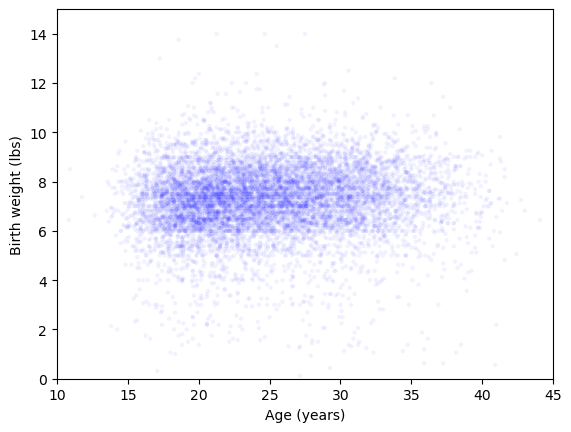

In [29]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz")

import numpy as np
import thinkstats2
import thinkplot
import first
import pandas as pd
import random
import math

live, firsts, others = first.MakeFrames()
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])

# scatter plot of birth weight versus mother’s age

thinkplot.Scatter(ages, weights, alpha=0.05, s=10)
thinkplot.Config(xlabel='Age (years)',
                     ylabel='Birth weight (lbs)',
                     xlim=[10, 45],
                     ylim=[0, 15],
                     legend=False)




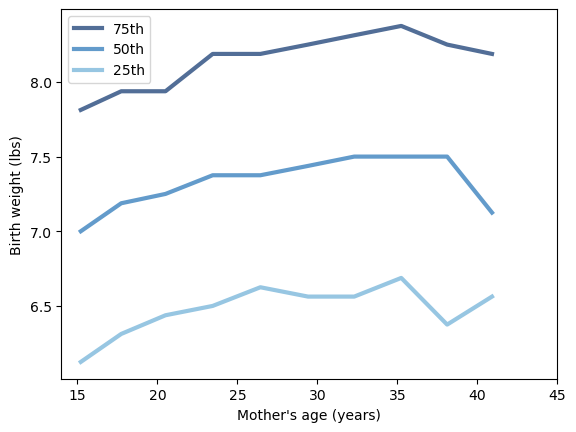

In [30]:
# Plot percentiles of birth weight versus       mother’s ag

def BinnedPercentiles(df):
    """Bin the data by age and plot percentiles of weight for each bin.

    df: DataFrame
    """
    bins = np.arange(10, 48, 3)
    indices = np.digitize(df.agepreg, bins)
    groups = df.groupby(indices)

    ages = [group.agepreg.mean() for i, group in groups][1:-1]
    cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups][1:-1]

    thinkplot.PrePlot(3)
    for percent in [75, 50, 25]:
        weights = [cdf.Percentile(percent) for cdf in cdfs]
        label = '%dth' % percent
        thinkplot.Plot(ages, weights, label=label)

    thinkplot.Config(xlabel="Mother's age (years)",
                     ylabel='Birth weight (lbs)',
                     xlim=[14, 45], legend=True)
    
BinnedPercentiles(live)

In [31]:
# Compute Pearson’s and Spearman’s correlations

ages = live.agepreg
weights = live.totalwgt_lb
print('Corr', Corr(ages, weights))
print('SpearmanCorr', SpearmanCorr(ages, weights))


Corr 0.06883397035410908
SpearmanCorr 0.09461004109658226


In [ ]:
#   characterize the relationship between these variables.

#  Scaterplot shows weak relationship between birth weight versus mother’s age.
#  Pearson’s and Spearman’s correlations values are around 0.07 and around 0.09 respectively. Differnec between the values signifies non linear 
#  relationship.
   
#  Birth weight is more for mother ages between 15 to 25 and after that it's not much significant.   

#### Exercise 8.1: 

In this chapter we used ¯x and median to estimate µ, and found that ¯x yields lower MSE. Also, we used S2 and S2n−1
to estimate σ, and found that S2 is biased and S2n−1 unbiased.

Run similar experiments to see if ¯x and median are biased estimates of µ.Also check whether S2 or S2n−1 yields a lower MSE.

In [34]:
def MeanError(estimates, actual):
    """Computes the mean error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float mean error
    """
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

## Define Root mean squared error

def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return math.sqrt(mse)

# Execute an experiment to estimate the mean of a population based on a sample with size n=9 and run 500 iterations. 

def Estimate1(n=9, iters=500):
    """Evaluates RMSE of sample mean and median as estimators.

    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1')
    print('rmse xbar', RMSE(means, mu))
    print('rmse median', RMSE(medians, mu))
    
Estimate1()

# Define Estimate2

def Estimate2(n=9, iters=500):
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('mean error biased', MeanError(estimates1, sigma**2))
    print('mean error unbiased', MeanError(estimates2, sigma**2))
    
Estimate2()

Experiment 1
rmse xbar 0.3375895828930677
rmse median 0.41656363579849764
mean error biased -0.11988265034606727
mean error unbiased -0.009867981639325665


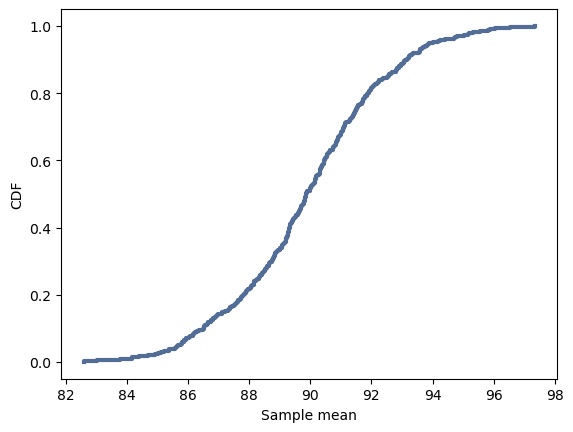

In [36]:
def SimulateSample(mu=90, sigma=7.5, n=9, iters=500):
    xbars = []
    for j in range(iters):
        xs = np.random.normal(mu, sigma, n)
        xbar = np.mean(xs)
        xbars.append(xbar)
    return xbars

xbars = SimulateSample()

cdf = thinkstats2.Cdf(xbars)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Sample mean',
                 ylabel='CDF')

In [38]:
# The mean of the sample means is close to the actual value of  𝜇
 
np.mean(xbars)

89.89599469437374

#### Exercise 8.2: 

Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.
Repeat the experiment with a few different values of n and make a plot of standard error versus n.

standard error 0.8077832027948276
confidence interval (1.2593328828246124, 3.629621740723832)


0.8077832027948276

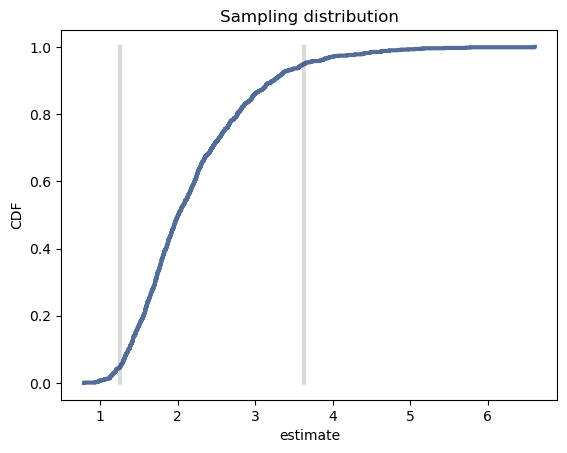

In [32]:
## Define SimulateSample

def SimulateSample(lam=2, n=10, iters=1000):
    """Sampling distribution of L as an estimator of exponential parameter.

    lam: parameter of an exponential distribution
    n: sample size
    iters: number of iterations
    """
    def VertLine(x, y=1):
        thinkplot.Plot([x, x], [0, y], color='0.8', linewidth=3)

    estimates = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        lamhat = 1.0 / np.mean(xs)
        estimates.append(lamhat)

    stderr = RMSE(estimates, lam)
    print('standard error', stderr)

    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    print('confidence interval', ci)
    VertLine(ci[0])
    VertLine(ci[1])

    # plot the CDF
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='estimate',
                     ylabel='CDF',
                     title='Sampling distribution')

    return stderr

SimulateSample()